In [1]:
import zipfile
import os

if not os.path.exists('files'):
  with zipfile.ZipFile('files.zip', 'r') as zip_ref:
    zip_ref.extractall('files')

  with open('files/.gitignore', 'w') as file:
    file.write('*')

In [2]:
import tensorflow as tf

In [3]:
labels = ['bird', 'lion', 'owl', 'parrot', 'raccoon', 'skull', 'snail', 'snake', 'squirrel', 'tiger']

xs = []
ys = []

for idx, label in enumerate(labels):
  for (dirpath, dirnames, filenames) in os.walk(os.path.join('files', label)):
    for filename in filenames:
      file_content = tf.io.read_file(os.path.join(dirpath, filename))
      img_tensor = tf.io.decode_image(file_content, 1)
      xs.append(img_tensor)
      ys.append(idx)
    print('{} -> finished'.format(dirpath))
    break


files\bird -> finished
files\lion -> finished
files\owl -> finished
files\parrot -> finished
files\raccoon -> finished
files\skull -> finished
files\snail -> finished
files\snake -> finished
files\squirrel -> finished
files\tiger -> finished


In [4]:
xs = tf.convert_to_tensor(xs)
ys = tf.convert_to_tensor(ys)

In [5]:
indices = tf.range(start=0, limit=tf.shape(xs)[0], dtype=tf.int32)

idx = tf.random.shuffle(indices)

xs = tf.gather(xs, idx)
ys = tf.gather(ys, idx)

(87541, 28, 28, 1)


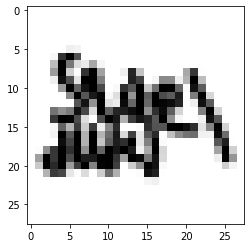

In [6]:
import matplotlib.pyplot as plt

print(xs.shape)

plt.imshow(xs[0], cmap='gray')

In [7]:
y = tf.one_hot(ys, 10)

In [8]:
xnorm = xs / 255

In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(
  tf.keras.layers.Conv2D(
    filters=16,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu',
    kernel_initializer=tf.keras.initializers.HeNormal(),
    input_shape=(28, 28, 1)
  )
)
model.add(tf.keras.layers.MaxPooling2D(
  pool_size=(2, 2),
  strides=2
))

In [11]:
model.add(
  tf.keras.layers.Conv2D(
    filters=32,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu'
  )
)
model.add(tf.keras.layers.MaxPooling2D(
  pool_size=(2, 2),
  strides=2
))

In [12]:
model.add(
  tf.keras.layers.Conv2D(
    filters=64,
    kernel_size=3,
    strides=1,
    padding='same',
    activation='relu'
  )
)
model.add(tf.keras.layers.MaxPooling2D(
  pool_size=(2, 2),
  strides=2
))

In [13]:
model.add(tf.keras.layers.Flatten())

In [14]:
model.add(tf.keras.layers.Dense(
  units=128,
  activation='tanh'
))
model.add(tf.keras.layers.Dense(
  units=10,
  activation='softmax'
))

In [15]:
model.compile(
  optimizer='Adam',
  loss=tf.keras.losses.CategoricalCrossentropy(),
  metrics=['accuracy']
)

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [17]:
model.fit(xnorm, y, epochs=20, batch_size=256)

Epoch 1/20
